# 爬取图片



## 爬取瀑布流照片

Masonry Layouts

用 Chrome 的开发者工具在 network 里检查每次下拉时的XMLHttpRequest（XHR）对象，发现请求的新网址：
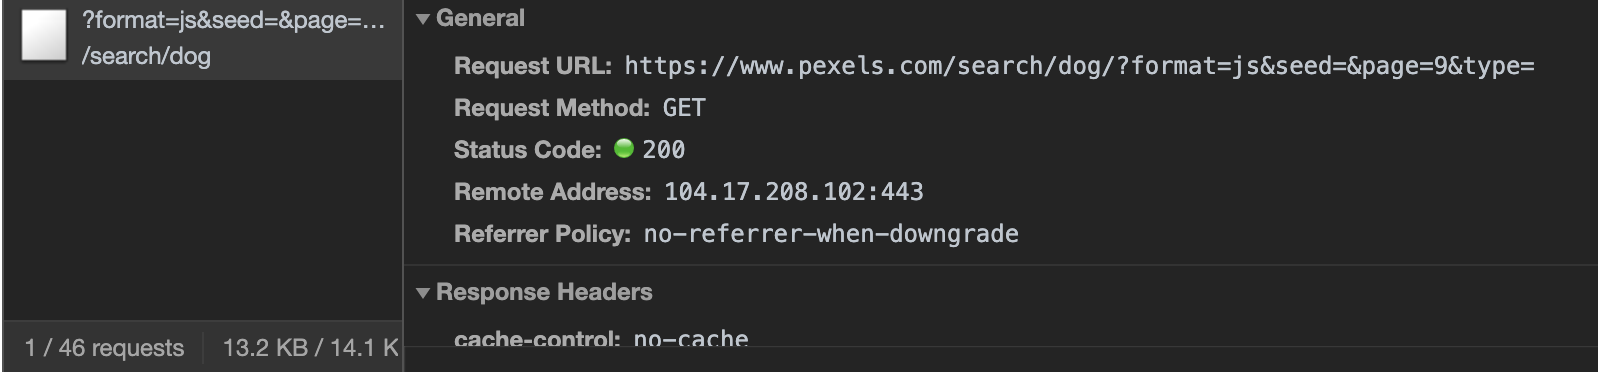



https://www.pexels.com/search/dog/?format=js&seed=&page=9&type=

发现打不开修改掉 js 和 seed 属性

https://www.pexels.com/search/dog/?page=9&type=




请求照片链接，再存入文件中。



也可以在 element 里找到线索：

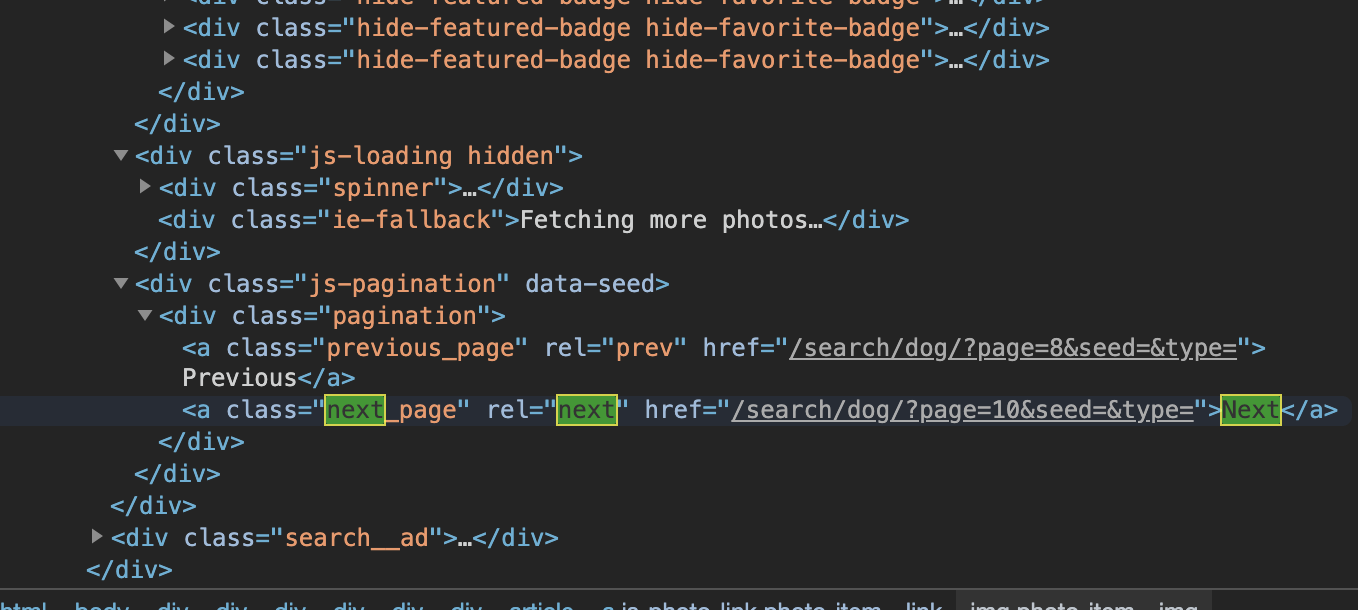

In [4]:
import requests
from lxml import etree


headers = {
    'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36"
} 

In [30]:
urls = ["https://www.pexels.com/search/dog/?page={}&seed=&type=".format(str(i) for i in range(1,10))]
path = '/Users/apple/Downloads/Code/crawler/pic/'


for i in range(1,10):
    url = "https://www.pexels.com/search/dog/?page={}&seed=&type=".format(str(i))
    res = requests.get(url, headers=headers)
    selector= etree.HTML(res.text)

    pic_urls = selector.xpath("/html/body/div[1]/div[3]/div[3]/div[1]/div[2]/div[@class='hide-featured-badge hide-favorite-badge']/article/a[1]/img/@src")
    for j,pic_url in enumerate(pic_urls):

        data = requests.get(pic_url, headers)
        fp = open(path+str(i*10+j)+".jpg","wb")
        fp.write(data.content)
        fp.close()
    
